# Training a Multilayer Neural Network for Image Classification

Importing all needed packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import os
import tensorflow as tf


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Load MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Normalize pixel values to [0, 1]

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Reshape data for neural network input

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28), y_train shape: (60000, 10)
x_test shape: (10000, 28, 28), y_test shape: (10000, 10)


### Plot a few samples with their labels

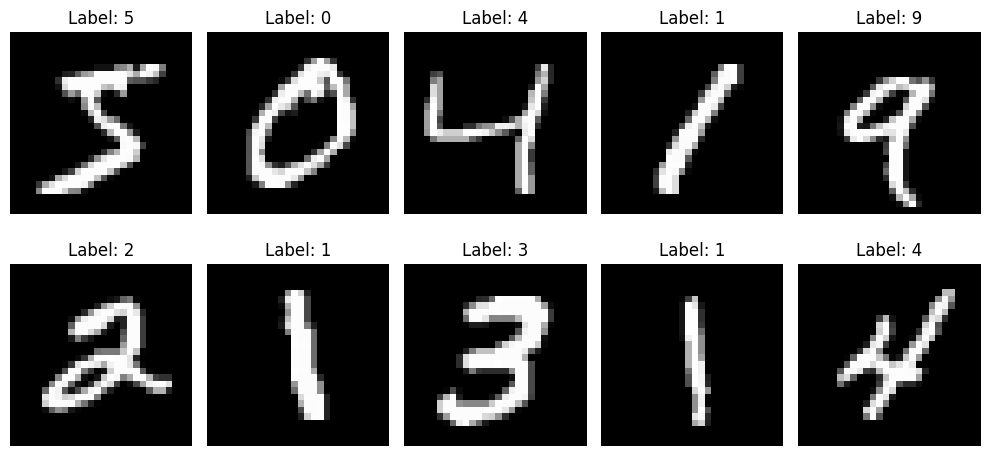

In [6]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()

## Define the neural network architecture

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

Build the neural network model

In [8]:
model = Sequential([
    Input(shape=(28, 28, 1)),  
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

Compile the model

In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  
)

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [11]:
history = model.fit(
    x_train,        # Training images
    y_train,        # Training labels
    epochs=10,      
    batch_size=128, 
    validation_split=0.2  # Use 20% of training data for validation
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6989 - loss: 0.9101 - val_accuracy: 0.9676 - val_loss: 0.1115
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9372 - loss: 0.2208 - val_accuracy: 0.9793 - val_loss: 0.0783
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9496 - loss: 0.1951 - val_accuracy: 0.9796 - val_loss: 0.0810
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9562 - loss: 0.1850 - val_accuracy: 0.9831 - val_loss: 0.0772
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9601 - loss: 0.1803 - val_accuracy: 0.9821 - val_loss: 0.0800
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9601 - loss: 0.1872 - val_accuracy: 0.9835 - val_loss: 0.0948
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9623 - loss: 0.1955 - val_accuracy: 0.9842 - val_loss: 0.0773
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9626 - loss: 0.1994 - val_accu

## Evaluate the model

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 - 2s - 7ms/step - accuracy: 0.9847 - loss: 0.0904
Test Accuracy: 0.9847


## Visualizing the training process

Plot training and validation accuracy

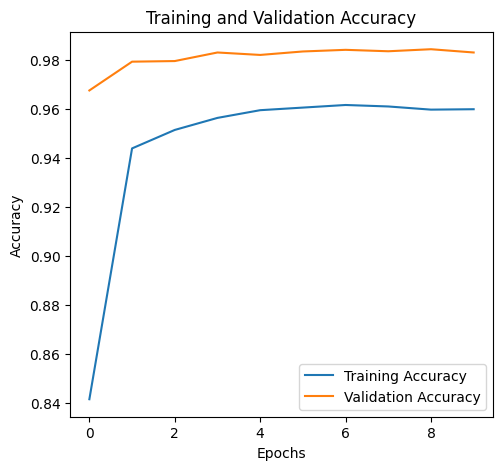

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Plot training and validation loss

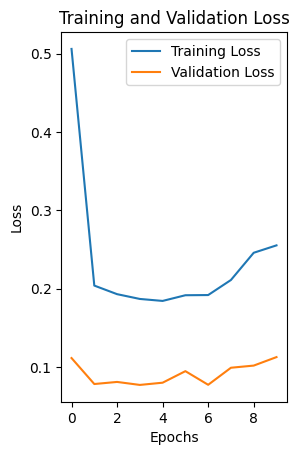

In [14]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Now test the model on individual Images

In [15]:
import numpy as np

random_idx = np.random.randint(0, len(x_test))
test_image = x_test[random_idx]
test_label = np.argmax(y_test[random_idx])

Predict the label for the test image

In [16]:
prediction = np.argmax(model.predict(test_image.reshape(1, 28, 28, 1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Plot the image and show prediction

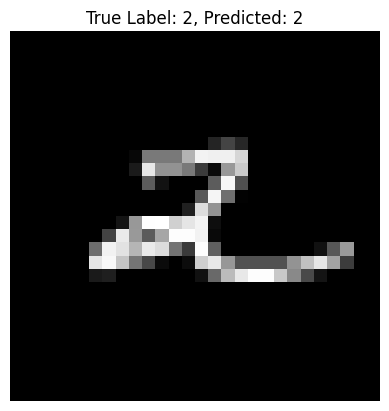

In [17]:
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {test_label}, Predicted: {prediction}")
plt.axis('off')
plt.show()

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"The Highest Test Accuracy Achieved: {test_accuracy * 100:.2f}%")

The Highest Test Accuracy Achieved: 98.47%
